# Linear (ordinary) least squares

Suppose we have a set of points $\left\{ (x_i, y_i), i = 1, \ldots, n \right\}$ and a functional form $f(x, \vec \beta)$, where $\vec \beta$ is a vector of parameters.

Then, *least squares approximation* is a problem of finding $\vec \beta$ by minimising function
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - f(x_i, \vec \beta) \right|^2 $$

Least squares approximation becomes *linear (or ordinary)* when we assume that $f(x, \vec \beta)$ is a linear function of $\vec \beta$: 
$$f(x, \vec \beta) = \sum \limits_{j = 1}^m \beta_j \varphi_j (x),$$
where $\varphi_j (x)$ are called basis functions which do not need to be linear ($x^k$, $e^{i \alpha_k x}$ etc.).

We minimize with respect to $\vec \beta$
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - \left( \beta_1 \varphi_1(x) + \ldots + \beta_m \varphi_m(x) \right) \right|^2 .$$
It can be represented as 
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2,$$
if we suppose that a vector norm $||\vec a|| = \sqrt{\sum\limits_{i = 1}^n |a_i|^2}$ and *the design matrix*
$$ A = \begin{pmatrix} 
            \varphi_1(x_1) & \varphi_2(x_1) & \ldots & \varphi_m(x_1) \\
            \varphi_1(x_2) & \varphi_2(x_2) & \ldots & \varphi_m(x_2) \\
            \vdots & \vdots & \ddots & \vdots \\
            \varphi_1(x_n) & \varphi_2(x_n) & \ldots & \varphi_m(x_n) \\
        \end{pmatrix}.$$

To minimize $\xi (\vec \beta)$ we set 
$$\cfrac{\partial}{\partial \beta_k} \xi (\vec \beta) = 0, \; k = 1, \ldots, m, $$
and obtain *the normal equation*
$$A^T A \vec \beta = A^T \vec y.$$

If $A$ is poorly conditioned, then solving this matrix equation becomes a big problem. In this case QR decomposition of $A$ is often used. The design matrix can be represented as 
$$A = Q \cdot R,$$
where $Q$ is orthoginal ($Q^T Q = 1$), and $R$ is upper triangular.

Since $m < n$ last $n-m$ rows of $R$ are zero:
$$A = Q \cdot \begin{pmatrix} 
                    R_1 \\
                    0 \\
                \end{pmatrix}.$$
Recall tht matrix $Q$ is a rotation operator, and introduced norm of a vector is invariant to rotation. Then, we rotate the residual $\vec y - A \vec \beta$:
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2 = || Q^T \left( \vec y - A \vec \beta \right) ||^2 = || Q^T \vec y - \begin{pmatrix} 
    R_1 \\
    0 \\
\end{pmatrix} \vec \beta ||^2. $$

Let us write 
$$Q^T \vec y = \begin{pmatrix} 
                    \vec f \\
                    \vec r \\
                \end{pmatrix},$$
where $\mbox{dim} \vec f = m$.

This way,
$$\xi ( \vec \beta ) = ||\vec f - R_1 \vec \beta||^2 + ||\vec r||^2 \rightarrow \min \Leftrightarrow R_1 \vec \beta = \vec f.$$

The last equation is solved by back substitution.

## Task

Let the basis function be $x^k, \; k = 0, \ldots, m$. Write function that finds $\vec \beta$ for $m = 1, 2, 3$.

[0 1 2 3 4 5 6 7 8 9]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


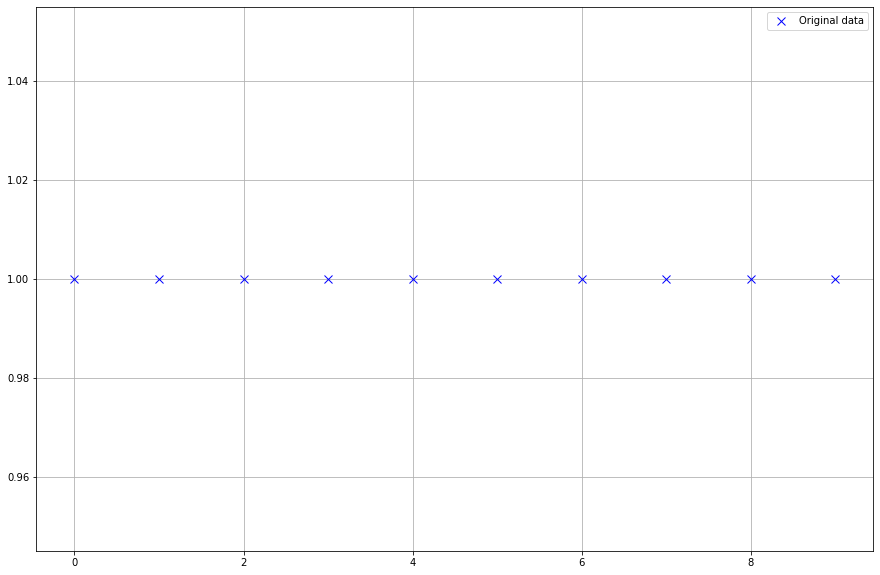


 beta =  0.0

 c =  1.0


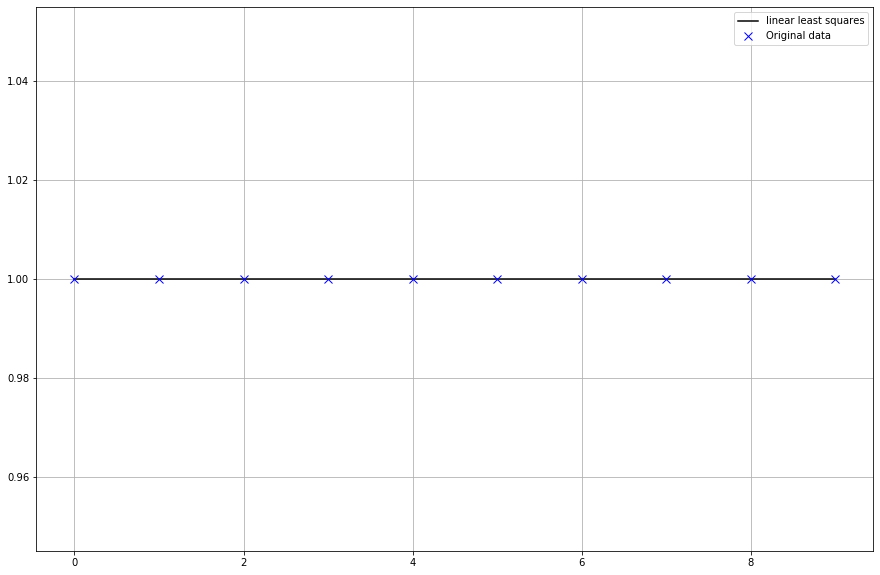

(0.0, 1.0)


In [42]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

def lsq(m):
    xdata = np.arange(0, 10)
    xdata = np.asarray(xdata)
    print(xdata)
    ydata = np.array([[0] * m for i in range(len(xdata))])
    print(ydata)



    def f(x, m):
        for i in range(len(xdata)):
            for j in range(m):

                ydata[i, j] = xdata[i]**j

        return ydata


    ydata = f(xdata, m)
    x_mean = np.mean(xdata)
    y_mean = np.mean(ydata)
    print(ydata)

    def least_squares(m, xdata, ydata):
        beta = np.zeros_like(ydata)
        num = 0
        den = 0
        for i in range(len(xdata)):
            beta = 0
            for j in range(m):
                num += (xdata[i] - x_mean) * (ydata[i, j] - y_mean)
                den += (xdata[i] - x_mean)**2
            beta = num / den
            c = y_mean - beta * x_mean
        print('\n beta = ', beta)
        print('\n c = ', c)
        return beta, c





    # initial plot
    plt.figure(figsize=(15,10))
    plt.plot(xdata, ydata, 'x', label='Original data', markersize=8, color='blue') # predicted
    plt.grid(True)
    plt.legend()
    plt.show()



    beta, c = least_squares(m, xdata, ydata)   
    y_approx = beta * xdata + c

    plt.figure(figsize=(15,10))
    plt.plot([min(xdata), max(xdata)], [min(y_approx), max(y_approx)], label = 'linear least squares', color='black')
    plt.plot(xdata, ydata, 'x', label='Original data', markersize=8, color='blue') # predicted
    plt.grid(True)
    plt.legend()
    plt.show()
    return beta, c

print(lsq(1))

Now implement your function to approximate real data.

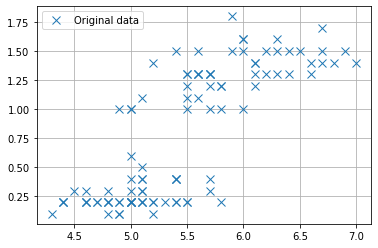

In [96]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline


def least_squares_real(m, xdata, ydata):
    beta = np.zeros_like(ydata)
    num = 0
    den = 0
    for i in range(len(xdata)):
        beta = 0
        for j in range(m):
            num += (xdata[i] - x_mean) * (ydata[i] - y_mean)
            den += (xdata[i] - x_mean)**2
        beta = num / den
        c = y_mean - beta * x_mean
    print('\n beta = ', beta)
    print('\n c = ', c)
    return beta, c

diabetes = datasets.load_iris()
X = diabetes.data
y = diabetes.target

ydata = X[:100,-1]
xdata = X[:100,0]

x_mean = np.mean(xdata)
y_mean = np.mean(ydata)

plt.plot(xdata, ydata, 'x', label='Original data', markersize=8)
plt.grid(True)
plt.legend()
plt.show()

Plot the resulting functions.


 beta =  0.6954194559668757

 c =  -3.0186398435947774


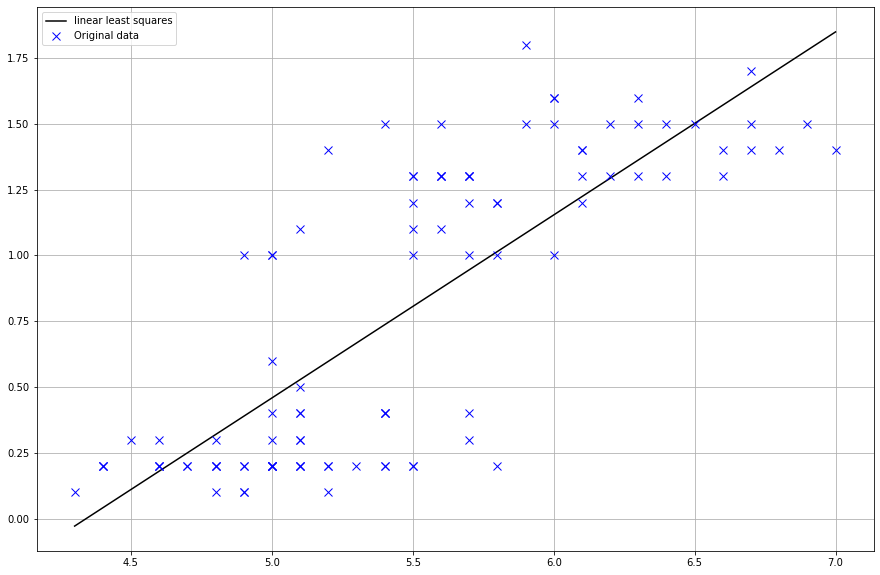

In [97]:
beta, c = least_squares_real(10, xdata, ydata)   
y_approx = beta * xdata + c

plt.figure(figsize=(15,10))
plt.plot([min(xdata), max(xdata)], [min(y_approx), max(y_approx)], label = 'linear least squares', color='black')
plt.plot(xdata, ydata, 'x', label='Original data', markersize=8, color='blue') # predicted
plt.grid(True)
plt.legend()
plt.show()

Output the comma-separated list of coefficients before $x$. You will need this for Google Form.

In [133]:
coefs = []

'''for m in range(1, 4):
    coefs.append(str(lsq(m)[1]))
    
print(",".join(coefs))'''
x = [[xdata[i]] for i in range(len(xdata))]
x = np.asarray(x)
print(x)
coeffs = inv(x.transpose().dot(x)).dot(x.transpose()).dot(ydata)
print(coeffs)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]]
[0.15108027]


Output the comma-separated list of average quadratic deviations. You will need this for Google Form.

*Reminder*: Average quadratic deviation = $\cfrac{1}{n} \sum\limits_{i = 1}^{n} \left| y_i - f(x_i, \vec \beta) \right|^2 $, where $n$ is the number of observations.

In [ ]:
aqds = []

for m in range(1, 4):
    cur_aqd = # ... 
    
    aqds.append(str(cur_aqd))
    
print(",".join(aqds))